In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('iris.csv')
(train_set, test_set) = train_test_split(
    df.values, test_size=0.7, random_state=278805)

In [3]:
def classify_iris(sepal_length, sepal_width, petal_length, petal_width):
    if (petal_width <= 0.6):
        return 'setosa'
    elif (petal_width <= 1.8):
        return 'versicolor'
    else:
        return 'virginica'


In [4]:
number_good_guesses = 0
for iris in test_set:
    if iris[len(iris) - 1] == classify_iris(iris[0], iris[1], iris[2], iris[3]):
        number_good_guesses += 1

print(f"Accuracy: {number_good_guesses / test_set.shape[0]}")
print(f"Accuracy: {number_good_guesses / test_set.shape[0] * 100}%")

Accuracy: 0.9238095238095239
Accuracy: 92.38095238095238%


[Text(0.4, 0.875, 'x[2] <= 2.9\ngini = 0.654\nsamples = 45\nvalue = [18, 11, 16]'),
 Text(0.2, 0.625, 'gini = 0.0\nsamples = 18\nvalue = [18, 0, 0]'),
 Text(0.6, 0.625, 'x[2] <= 4.95\ngini = 0.483\nsamples = 27\nvalue = [0, 11, 16]'),
 Text(0.4, 0.375, 'x[3] <= 1.7\ngini = 0.153\nsamples = 12\nvalue = [0, 11, 1]'),
 Text(0.2, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11, 0]'),
 Text(0.6, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.8, 0.375, 'gini = 0.0\nsamples = 15\nvalue = [0, 0, 15]')]

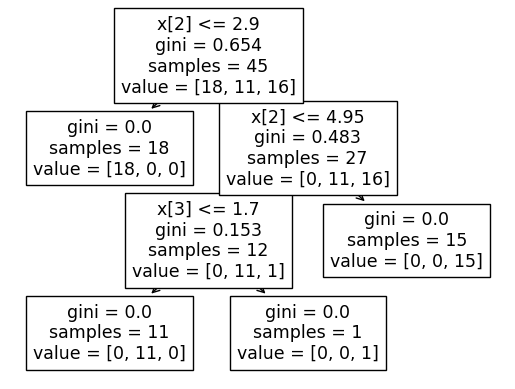

In [5]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

clf = DecisionTreeClassifier()
clf = clf.fit(train_set[:, 0:4], train_set[:, 4])

plot_tree(clf)


In [6]:
from sklearn.metrics import confusion_matrix
number_good_guesses = 0
for iris in test_set:
    if iris[len(iris) - 1] == clf.predict([iris[0:4]]):
        number_good_guesses += 1

print(f"Accuracy: {number_good_guesses / test_set.shape[0]}")
print(f"Accuracy: {number_good_guesses / test_set.shape[0] * 100}%")

confusion_matrix(test_set[:, 4], clf.predict(test_set[:, 0:4]))


Accuracy: 0.9714285714285714
Accuracy: 97.14285714285714%


array([[32,  0,  0],
       [ 0, 36,  3],
       [ 0,  0, 34]])